In [19]:
import pandas as pd
import numpy as np

In [2]:
def read_in(file):
    df = pd.read_csv(file, dtype="str")
    df.drop(["metro_area", "place_id", "country_region", "iso_3166_2_code"], inplace = True, axis = 1)
    df.columns = ["country", "state", "county", "fips code", "date", \
    "retail_rec", "grocery_pharm", "parks", "transit", "workplace", "residential"]
    df_mid = df[df["state"].isin(["Illinois", "Ohio", "Michigan", "Missouri"]) ]
    return df_mid

In [3]:
import os
os.chdir("/Users/sophiamlawer/ML_project/CAPP-30254-Covid-Variants")
os.getcwd()

'/Users/sophiamlawer/ML_project/CAPP-30254-Covid-Variants'

In [20]:
df = read_in("Raw_Data/2020_US_Region_Mobility_Report.csv")
df2 = read_in("Raw_Data/2021_US_Region_Mobility_Report_update.csv")
df = df.append(df2, ignore_index=True)
#df["st_county"] = df.state + " - " + df.county
df = df.rename(columns = {"fips code": "fips"})
print(df.fips.nunique())
df.head()

377


,country,state,county,fips,date,retail_rec,grocery_pharm,parks,transit,workplace,residential
0,US,Illinois,NaN,NaN,2020-02-15,4,3,10,3,3,-1
1,US,Illinois,NaN,NaN,2020-02-16,8,2,29,3,2,-1
2,US,Illinois,NaN,NaN,2020-02-17,2,-3,-14,-13,-23,6
3,US,Illinois,NaN,NaN,2020-02-18,1,-1,5,2,1,0
4,US,Illinois,NaN,NaN,2020-02-19,1,-1,3,2,1,0


In [21]:
df[["retail_rec", "grocery_pharm", "parks", "transit", "workplace", "residential"]].astype(float)
print(df.shape)
df = df[df['fips'].notna()]
df['date']= pd.to_datetime(df['date'])
#df.dropna(subset = ["fips"])
#df.columns
print(df.shape)
df

(159191, 11)
(157327, 11)


,country,state,county,fips,date,retail_rec,grocery_pharm,parks,transit,workplace,residential
321,US,Illinois,Adams County,17001,2020-02-15,3,2,NaN,NaN,6,0
322,US,Illinois,Adams County,17001,2020-02-16,16,4,NaN,NaN,7,NaN
323,US,Illinois,Adams County,17001,2020-02-17,5,4,NaN,-12,-9,4
324,US,Illinois,Adams County,17001,2020-02-18,3,-4,NaN,NaN,1,0
325,US,Illinois,Adams County,17001,2020-02-19,4,-2,NaN,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...
159186,US,Ohio,Wyandot County,39175,2021-05-21,15,NaN,NaN,19,-16,0
159187,US,Ohio,Wyandot County,39175,2021-05-22,11,NaN,NaN,28,-6,NaN
159188,US,Ohio,Wyandot County,39175,2021-05-23,NaN,NaN,NaN,33,-14,NaN
159189,US,Ohio,Wyandot County,39175,2021-05-24,NaN,NaN,NaN,16,-8,3


In [22]:
#Export 
df.to_csv("Data/Mobility Data.csv", index=False)

In [23]:
# Explore Missing Data
miss = df.drop('fips', 1).isna().groupby([df.fips], sort=False).sum().reset_index()
miss["total"] = miss.iloc[:,-6:].sum(axis=1)
print(miss[miss["total"] > 407]["county"].shape)
miss.sort_values(by="total", ascending=False)

(315,)


,fips,country,state,county,date,retail_rec,grocery_pharm,parks,transit,workplace,residential,total
340,39105,0,0,0,0,390,441,441,441,0,441,2154
124,26053,0,0,0,0,385,427,436,436,5,436,2125
185,29013,0,0,0,0,390,408,441,441,0,441,2121
31,17067,0,0,0,0,395,395,441,441,0,439,2111
197,29039,0,0,0,0,394,390,441,441,0,441,2107
...,...,...,...,...,...,...,...,...,...,...,...,...
312,39049,0,0,0,0,0,0,9,0,0,0,9
19,17043,0,0,0,0,0,0,5,2,0,0,7
267,29199,0,0,0,0,1,1,1,1,0,1,5
376,29035,0,0,0,0,1,1,1,1,0,1,5


In [30]:
df[["retail_rec", "grocery_pharm", "parks", "transit","workplace","residential"]].astype(float)
df[["retail_rec", "grocery_pharm", "parks", "transit","workplace","residential"]].describe()


,retail_rec,grocery_pharm,parks,transit,workplace,residential
count,103942,92414,27283,52379,154703,93465
unique,263,209,470,235,134,45
top,-2,0,1,6,-16,5
freq,2485,3338,257,1003,4964,8399


In [28]:
df['date']= pd.to_datetime(df['date'])


country                  object
state                    object
county                   object
fips                     object
date             datetime64[ns]
retail_rec               object
grocery_pharm            object
parks                    object
transit                  object
workplace                object
residential              object
dtype: object

In [31]:
df_nan = df.dropna()

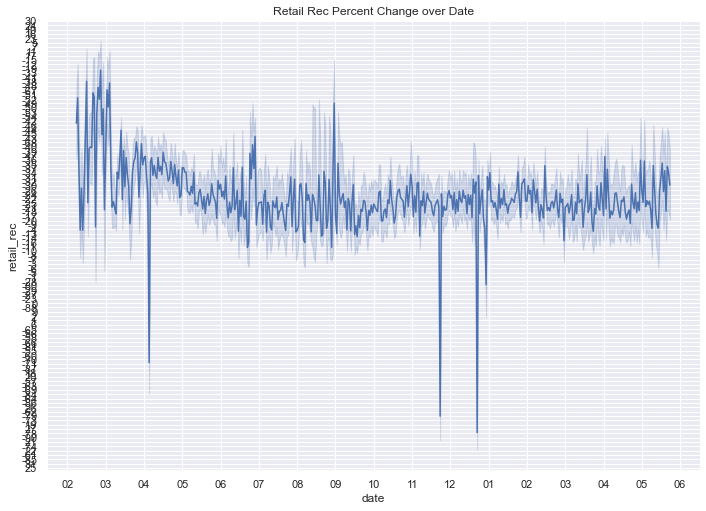

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
sns.lineplot(x=df_nan.date, y="retail_rec", data=df_nan).\
set(title="Retail Rec Percent Change over Date")
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=30))
plt.show()

<AxesSubplot:xlabel='date', ylabel='retail_rec'>

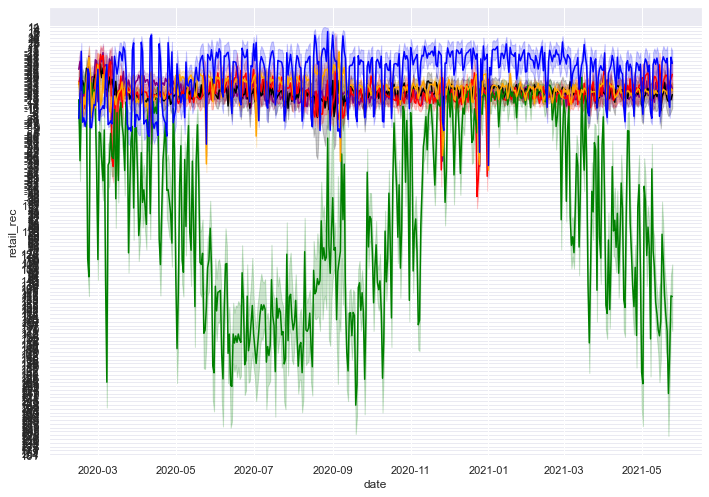

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=df_nan.date, y="retail_rec", data=df_nan, color='purple')
sns.lineplot(x=df_nan.date, y="transit", data=df_nan, color='black')
sns.lineplot(x=df_nan.date, y="grocery_pharm", data=df_nan, color='red')
sns.lineplot(x=df_nan.date, y="parks", data=df_nan, color='green')
sns.lineplot(x=df_nan.date, y="workplace", data=df_nan, color='orange')
sns.lineplot(x=df_nan.date, y="residential", data=df_nan, color='blue')

<AxesSubplot:xlabel='date', ylabel='retail_rec'>

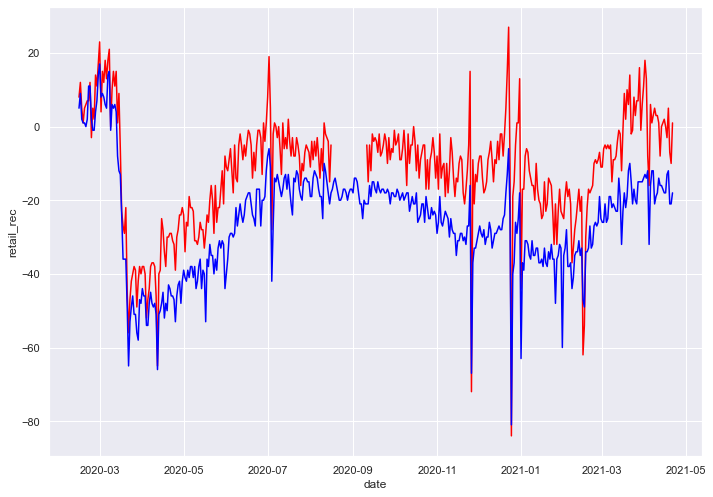

In [28]:
data_conserv= df[df["county"]== "Effingham County"]
data_lib= df[df["county"]== "Cook County"]
sns.lineplot(x=df.date, y="retail_rec", data=data_conserv, color='red')
sns.lineplot(x=df.date, y="retail_rec", data=data_lib, color='blue')